In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## T2 PvL

In [2]:
data = pd.read_csv('merge_denovo_BAlim_t2pvl.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,g__Ruminococcus.2,g__Dorea,f__Lachnospiraceae.13,f__Lachnospiraceae.14,f__Rikenellaceae.1,f__Ruminococcaceae.2,f__Ruminococcaceae.3,f__S24-7.3,Week,Category
OTUID,,,,,,,,,,,,,,,,,,,,,
570.T2,0,43335,0,0,0,0,0,19372,0,0,...,138,0,114,339,139,59,124,183,2,Placebo
571.T2,0,47148,0,0,0,0,0,0,0,0,...,0,0,0,23,0,0,0,0,2,Placebo
572.T2,0,0,0,10539,0,0,0,25594,0,0,...,44,0,0,65,0,0,0,0,2,Placebo
573.T2,0,0,0,0,0,0,0,145888,0,4101,...,0,0,40,0,0,0,0,0,2,Placebo
574.T2,0,7217,0,0,0,0,0,10382,0,0,...,30,28,25,241,56,12,64,123,2,Placebo
575.T2,5456,0,0,0,0,0,0,54213,10630,0,...,74,0,0,133,0,0,0,62,2,Placebo
576.T2,0,0,0,0,0,0,0,0,0,0,...,0,119,0,250,5,0,20,0,2,Placebo
577.T2,0,0,0,0,0,0,0,0,0,0,...,0,0,56,78,4,0,0,0,2,Placebo
578.T2,0,0,0,0,0,0,0,22266,0,0,...,0,0,106,0,37,0,0,0,2,Letrozole


In [4]:
data.iloc[:,0:207]

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,g__Anaeroplasma,f__Lachnospiraceae.12,g__Ruminococcus.2,g__Dorea,f__Lachnospiraceae.13,f__Lachnospiraceae.14,f__Rikenellaceae.1,f__Ruminococcaceae.2,f__Ruminococcaceae.3,f__S24-7.3
OTUID,,,,,,,,,,,,,,,,,,,,,
570.T2,0,43335,0,0,0,0,0,19372,0,0,...,124,135,138,0,114,339,139,59,124,183
571.T2,0,47148,0,0,0,0,0,0,0,0,...,0,32,0,0,0,23,0,0,0,0
572.T2,0,0,0,10539,0,0,0,25594,0,0,...,0,48,44,0,0,65,0,0,0,0
573.T2,0,0,0,0,0,0,0,145888,0,4101,...,28,0,0,0,40,0,0,0,0,0
574.T2,0,7217,0,0,0,0,0,10382,0,0,...,29,44,30,28,25,241,56,12,64,123
575.T2,5456,0,0,0,0,0,0,54213,10630,0,...,0,0,74,0,0,133,0,0,0,62
576.T2,0,0,0,0,0,0,0,0,0,0,...,308,0,0,119,0,250,5,0,20,0
577.T2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,78,4,0,0,0
578.T2,0,0,0,0,0,0,0,22266,0,0,...,0,0,0,0,106,0,37,0,0,0


In [6]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,208]
x = data.iloc[:,0:207]

In [7]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

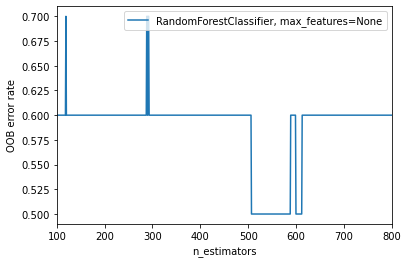

In [8]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 800

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [9]:
clf = RandomForestClassifier(n_estimators=550, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.6


In [10]:
clf_final = RandomForestClassifier(n_estimators=550, bootstrap=True,max_features=None,oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.3333333333333333


In [11]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6666666666666667

In [12]:
print(clf_final.oob_score_)

0.5


In [13]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

90     0.103636
133    0.100000
195    0.073939
15     0.073333
158    0.067273
193    0.059394
161    0.056970
173    0.045455
121    0.032121
174    0.027273
65     0.026667
86     0.023636
166    0.021818
196    0.021818
115    0.021212
202    0.018182
191    0.014545
168    0.012727
172    0.012727
123    0.012727
dtype: float64

In [14]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
3β-Hydroxy-5-cholenoic acid (NIST14),0.103636
Lithocholic acid (NIST14),0.100000
f__Ruminococcaceae.1,0.073939
β-Hyodeoxycholic acid.7,0.073333
f__Lachnospiraceae,0.067273
g__Oscillospira.4,0.059394
g__Lactobacillus,0.056970
g__Odoribacter,0.045455
Deoxycholic acid (NIST14).1,0.032121
g__Anaerostipes,0.027273


In [15]:
imp.head(10).to_csv("RF_plot_time2_pvl.csv")

## T2 LvCoL

In [16]:
data = pd.read_csv('merge_denovo_BAlim_t2lvcol.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,g__Ruminococcus.2,g__Dorea,f__Lachnospiraceae.13,f__Lachnospiraceae.14,f__Rikenellaceae.1,f__Ruminococcaceae.2,f__Ruminococcaceae.3,f__S24-7.3,Week,Category
OTUID,,,,,,,,,,,,,,,,,,,,,
578.T2,0,0,0,0,0,0,0,22266,0,0,...,0,0,106,0,37,0,0,0,2,Letrozole
580.T2,0,0,0,0,0,0,0,0,0,0,...,39,0,0,0,391,0,0,0,2,Letrozole
581.T2,3569,0,0,0,0,0,0,0,0,0,...,45,0,22,0,0,0,0,0,2,Letrozole
582.T2,0,0,0,0,0,0,0,76694,0,11171,...,0,0,0,66,0,0,0,0,2,Letrozole
583.T2,0,0,0,0,0,0,0,67035,0,0,...,0,0,0,0,0,38,160,16,2,Letrozole
584.T2,0,17388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,34,2,Letrozole
585.T2,0,0,0,0,0,0,40110,40855,0,0,...,86,0,0,77,240,0,154,35,2,Letrozole
586.T2,0,0,0,0,0,0,0,16858,0,0,...,126,0,64,121,82,0,0,152,2,Letrozole
589.T2,0,0,0,0,0,25336,80104,0,0,0,...,0,0,0,0,0,0,0,0,2,Co-L


In [18]:
data.iloc[:,208]

OTUID
578.T2    Letrozole
580.T2    Letrozole
581.T2    Letrozole
582.T2    Letrozole
583.T2    Letrozole
584.T2    Letrozole
585.T2    Letrozole
586.T2    Letrozole
589.T2         Co-L
593.T2         Co-L
595.T2         Co-L
597.T2         Co-L
599.T2         Co-L
601.T2         Co-L
603.T2         Co-L
Name: Category, dtype: object

In [19]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,208]
x = data.iloc[:,0:207]

In [20]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

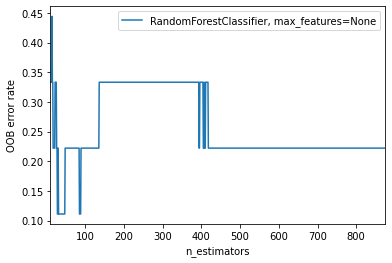

In [21]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 875

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [22]:
clf = RandomForestClassifier(n_estimators=500, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

/home/basilin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean Validation Scores: 0.8


In [23]:
clf_final = RandomForestClassifier(n_estimators=500, bootstrap=True, max_depth=10, max_features=None,
                                   random_state= 42, min_samples_split=.7)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.3333333333333333


In [24]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

In [25]:
print(oob_error)

0.2222222222222222


In [26]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

103    0.085271
135    0.077519
112    0.077519
133    0.069767
0      0.069767
147    0.062016
141    0.054264
40     0.054264
115    0.031008
134    0.031008
91     0.031008
74     0.023256
78     0.023256
15     0.023256
138    0.023256
116    0.023256
117    0.015504
195    0.015504
176    0.015504
193    0.015504
dtype: float64

In [27]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Cholic acid (NIST14).5,0.085271
Cholic acid (NIST14).14,0.077519
Tauroursodeoxycholic acid (NIST14).1,0.077519
Lithocholic acid (NIST14),0.069767
α-Hyodeoxycholic acid methyl ester,0.069767
Ursocholic acid.3,0.062016
β-Muricholic acid.11,0.054264
Taurocholic acid.3,0.054264
Tauroursodeoxycholic acid (NIST14),0.031008
Cholic acid (NIST14).17,0.031008


In [28]:
imp.head(10).to_csv("RF_plot_time2_lvcol.csv")

## T5 LvCoL

In [29]:
data = pd.read_csv('merge_denovo_BAlim_t5lvcol.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,g__Ruminococcus.2,g__Dorea,f__Lachnospiraceae.13,f__Lachnospiraceae.14,f__Rikenellaceae.1,f__Ruminococcaceae.2,f__Ruminococcaceae.3,f__S24-7.3,Week,Category
OTUID,,,,,,,,,,,,,,,,,,,,,
578.T5,4451,182669,0,0,0,0,0,3662,1254,0,...,0,0,73,184,29,35,0,44,5,Letrozole
580.T5,0,0,0,0,0,0,64559,10891,0,0,...,0,58,64,0,98,30,0,95,5,Letrozole
581.T5,0,0,0,0,0,0,0,25466,0,0,...,0,58,0,0,87,26,0,120,5,Letrozole
582.T5,7304,29807,0,0,0,0,0,11725,0,0,...,0,32,73,248,0,41,0,163,5,Letrozole
583.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,120,86,0,63,156,5,Letrozole
584.T5,0,0,0,0,0,61532,0,131889,0,0,...,0,0,121,280,333,0,0,0,5,Letrozole
585.T5,0,0,0,0,0,0,0,0,11549,0,...,91,0,203,181,86,0,0,0,5,Letrozole
586.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,47,99,39,33,66,268,5,Letrozole
589.T5,0,0,0,0,0,0,0,0,0,0,...,81,0,0,128,0,0,7,0,5,Co-L


In [30]:
data.iloc[:,208]

OTUID
578.T5    Letrozole
580.T5    Letrozole
581.T5    Letrozole
582.T5    Letrozole
583.T5    Letrozole
584.T5    Letrozole
585.T5    Letrozole
586.T5    Letrozole
589.T5         Co-L
591.T5         Co-L
593.T5         Co-L
595.T5         Co-L
597.T5         Co-L
599.T5         Co-L
Name: Category, dtype: object

In [31]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,208]
x = data.iloc[:,0:207]

In [32]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

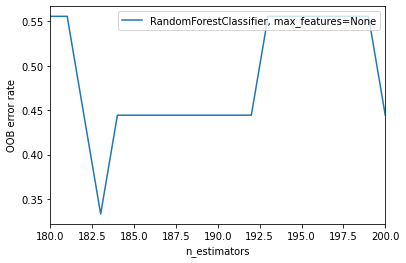

In [34]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 180
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [35]:
clf = RandomForestClassifier(n_estimators=182, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

/home/basilin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean Validation Scores: 0.7


In [36]:
clf_final = RandomForestClassifier(n_estimators=182, bootstrap=True, max_features=None,
                                   random_state= 40)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.4


In [37]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.9166666666666667

In [38]:
print(oob_error)

0.4444444444444444


In [39]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

175    0.083799
125    0.070531
206    0.067039
196    0.061453
195    0.061453
159    0.055866
112    0.050279
186    0.039106
40     0.033520
50     0.027933
188    0.022346
65     0.022346
73     0.022346
166    0.022346
21     0.022346
142    0.016760
57     0.016760
192    0.016760
163    0.016760
123    0.011173
dtype: float64

In [40]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
g__Lactobacillus.1,0.083799
Deoxycholic acid (NIST14).5,0.070531
f__S24-7.3,0.067039
f__Ruminococcaceae.1,0.061453
f__Lachnospiraceae.11,0.061453
f__Coriobacteriaceae,0.055866
Cholic acid (NIST14).14,0.050279
f__Lachnospiraceae.9,0.039106
β-Muricholic acid.11,0.033520
γ-Muricholic acid.6,0.027933


In [41]:
imp.head(10).to_csv("RF_plot_time5_lvcol.csv")

## T5 PvL

In [42]:
data = pd.read_csv('merge_denovo_BAlim_t5pvl.csv',sep=',', index_col = 0)
#data = data.T
data

,α-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester .1,α-Hyodeoxycholic acid methyl ester .2,α-Hyodeoxycholic acid methyl ester .3,α-Hyodeoxycholic acid methyl ester .4,α-Hyodeoxycholic acid methyl ester .5,α-Hyodeoxycholic acid methyl ester .6,α-Hyodeoxycholic acid methyl ester .7,β-Hyodeoxycholic acid,β-Hyodeoxycholic acid.1,...,g__Ruminococcus.2,g__Dorea,f__Lachnospiraceae.13,f__Lachnospiraceae.14,f__Rikenellaceae.1,f__Ruminococcaceae.2,f__Ruminococcaceae.3,f__S24-7.3,Week,Category
OTUID,,,,,,,,,,,,,,,,,,,,,
570.T5,0,0,170150,0,0,0,0,0,0,0,...,0,0,91,0,32,0,0,195,5,Placebo
571.T5,0,0,0,0,0,0,0,0,0,0,...,96,105,0,124,221,39,21,140,5,Placebo
572.T5,0,0,0,0,0,0,0,0,0,0,...,149,84,75,334,0,0,0,0,5,Placebo
573.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,141,140,0,0,0,112,5,Placebo
574.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,41,125,122,5,Placebo
575.T5,0,31465,0,0,0,0,0,10307,0,0,...,0,0,0,225,0,0,128,85,5,Placebo
576.T5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,517,49,0,0,0,5,Placebo
577.T5,0,0,0,0,0,0,0,11108,0,0,...,0,302,0,341,0,0,0,0,5,Placebo
578.T5,4451,182669,0,0,0,0,0,3662,1254,0,...,0,0,73,184,29,35,0,44,5,Letrozole


In [73]:
data.iloc[:,191]

SampleID
570.T5      Placebo
571.T5      Placebo
572.T5      Placebo
573.T5      Placebo
574.T5      Placebo
575.T5      Placebo
576.T5      Placebo
577.T5      Placebo
578.T5    Letrozole
580.T5    Letrozole
581.T5    Letrozole
582.T5    Letrozole
583.T5    Letrozole
584.T5    Letrozole
585.T5    Letrozole
586.T5    Letrozole
Name: Category, dtype: object

In [43]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,208]
x = data.iloc[:,0:207]

In [44]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

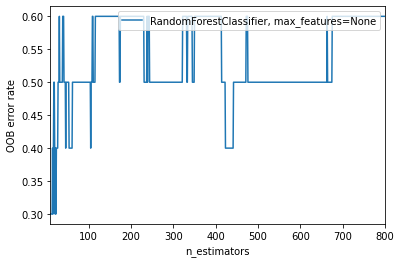

In [45]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 800


for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [46]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [56]:
clf_final = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features=None,oob_score=True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.3333333333333333


In [57]:
print(clf_final.oob_score_)

0.4


In [58]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

86     0.172619
203    0.111976
192    0.102667
184    0.074000
188    0.058667
186    0.056667
15     0.037976
122    0.035000
183    0.025667
164    0.021000
206    0.020000
202    0.020000
185    0.016976
84     0.013357
163    0.013333
65     0.013000
176    0.012310
128    0.011333
204    0.010000
170    0.008667
dtype: float64

In [59]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
12-Ketodeoxycholic acid (NIST14).2,0.172619
f__Rikenellaceae.1,0.111976
f__Lachnospiraceae.10,0.102667
g__Akkermansia,0.074000
g__Oscillospira.2,0.058667
f__Lachnospiraceae.9,0.056667
β-Hyodeoxycholic acid.7,0.037976
Deoxycholic acid (NIST14).2,0.035000
g__[Ruminococcus],0.025667
f__Rikenellaceae,0.021000


In [60]:
imp.head(10).to_csv("RF_plot_time5_pvl.csv")